# Keras人工神经网络简介

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
tf.__version__

'2.3.1'

In [4]:
keras.__version__

'2.4.0'

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [6]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [7]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [8]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

## 使用顺序API构建图像分类器

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape    # 训练集的形状和数据类型

(60000, 28, 28)

In [11]:
X_train_full.dtype    # 训练集的数据类型

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

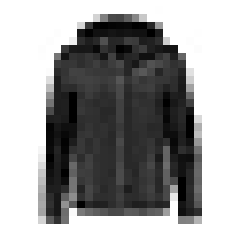

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names[y_train[0]]

'Coat'

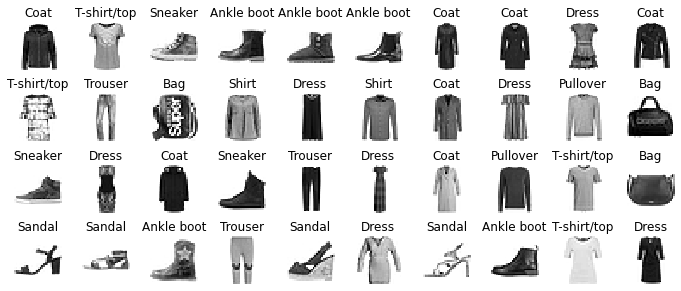

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
# 仅由顺序连接的单层堆栈组成
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers

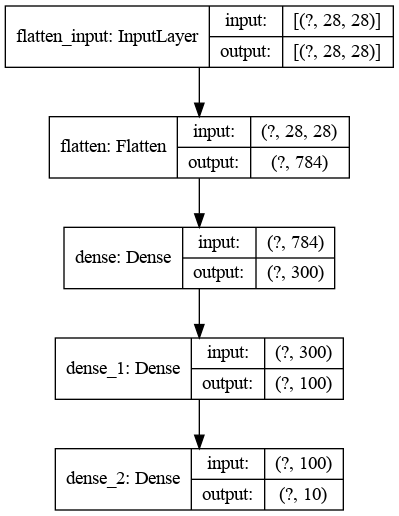

In [23]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer('dense') is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
             metrics=["accuracy"])
#model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
#              optimizer=keras.optimizers.SGD(), 
#              metrics=[keras.metrics.sparse_categorical_accuracy])

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# 每个轮次训练1719个小批量，验证误差是在每个轮次结束时计算的，而训练误差是使用每个轮次的运行平均值计算的（1719个小批量的平均误差）

Epoch 1/30
1719/1719 [==============================] - 1s 831us/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 1s 746us/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 1s 733us/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5332 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 1s 755us/step - loss: 0.4125 - accuracy: 0.8565 - val_loss: 0.3913 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 1s 716us/step - loss: 0.3942 - accuracy: 0.8620 - val_loss: 0.3754 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 1s 725us/step - loss: 0.3755 - accuracy: 0.8673 - val_loss: 0.3705 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 1s 743us/step - loss: 0.3635 - accuracy: 0.8713 - val_loss: 0.3617 -

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

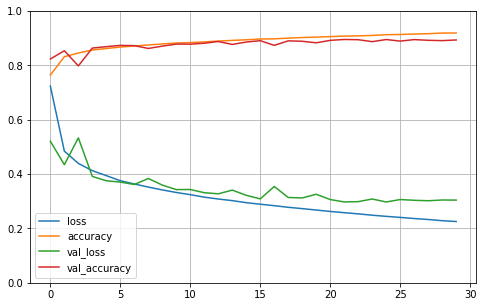

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))    # pandas的DataFrame类接口接受一个映射参数来构建实例
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()    # 绘制训练曲线时，应将其向左移动半个轮次，应为刚开始的半个轮次的训练误差比较大

In [35]:
X_test = X_test / 255.0
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 588us/step - loss: 0.3391 - accuracy: 0.8833


[0.33905985951423645, 0.8833000063896179]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [38]:
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

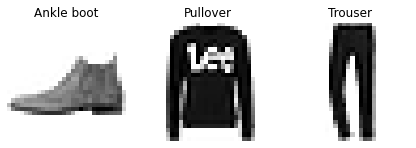

In [41]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 使用顺序API构建回归MLP

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# 根据相同的索引来拆分行数相同的数据集
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.transform(X_valid)
X_test = scalar.transform(X_test)

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [47]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 704us/step - loss: 0.8428 - val_loss: 0.8776
Epoch 2/20
363/363 [==============================] - 0s 601us/step - loss: 0.5852 - val_loss: 0.4970
Epoch 3/20
363/363 [==============================] - 0s 595us/step - loss: 0.4724 - val_loss: 0.4692
Epoch 4/20
363/363 [==============================] - 0s 600us/step - loss: 0.4445 - val_loss: 0.4594
Epoch 5/20
363/363 [==============================] - 0s 597us/step - loss: 0.4324 - val_loss: 0.4495
Epoch 6/20
363/363 [==============================] - 0s 599us/step - loss: 0.4237 - val_loss: 0.4425
Epoch 7/20
363/363 [==============================] - 0s 596us/step - loss: 0.4161 - val_loss: 0.4318
Epoch 8/20
363/363 [==============================] - 0s 597us/step - loss: 0.4082 - val_loss: 0.4311
Epoch 9/20
363/363 [==============================] - 0s 600us/step - loss: 0.4018 - val_loss: 0.4230
Epoch 10/20
363/363 [==============================] - 0s 601us/step - loss: 0.398

In [48]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 360us/step - loss: 0.3768


In [49]:
X_new = X_test[:3]

In [50]:
y_pred = model.predict(X_new)

In [51]:
y_pred

array([[0.6350653],
       [1.7379589],
       [3.5857038]], dtype=float32)

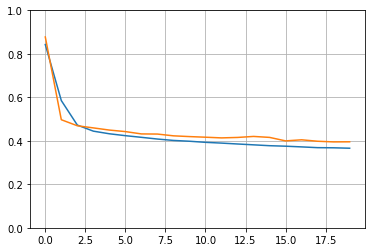

In [52]:
plt.plot(pd.DataFrame(history.history))
plt.grid('off')
plt.gca().set_ylim(0, 1)
plt.show()

## 使用函数式API构建复杂模型

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 778us/step - loss: 1.3035 - val_loss: 0.7101
Epoch 2/20
363/363 [==============================] - 0s 651us/step - loss: 0.6619 - val_loss: 0.6456
Epoch 3/20
363/363 [==============================] - 0s 655us/step - loss: 0.6156 - val_loss: 0.6133
Epoch 4/20
363/363 [==============================] - 0s 659us/step - loss: 0.5873 - val_loss: 0.5928
Epoch 5/20
363/363 [==============================] - 0s 662us/step - loss: 0.5664 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 0s 670us/step - loss: 0.5470 - val_loss: 0.5567
Epoch 7/20
363/363 [==============================] - 0s 649us/step - loss: 0.5324 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 0s 653us/step - loss: 0.5193 - val_loss: 0.5318
Epoch 9/20
363/363 [==============================] - 0s 658us/step - loss: 0.5088 - val_loss: 0.5219
Epoch 10/20
363/363 [==============================] - 0s 654us/step - loss: 0.499

In [57]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 381us/step - loss: 0.4568


In [58]:
y_pred = model.predict(X_new)
y_pred

array([[0.6082932],
       [1.7275202],
       [3.0231009]], dtype=float32)

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [61]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
_______________________________________________________________________________________

In [62]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 0s 793us/step - loss: 1.8248 - val_loss: 0.7923
Epoch 2/20
363/363 [==============================] - 0s 685us/step - loss: 0.7055 - val_loss: 0.6450
Epoch 3/20
363/363 [==============================] - 0s 672us/step - loss: 0.6258 - val_loss: 0.6057
Epoch 4/20
363/363 [==============================] - 0s 675us/step - loss: 0.5910 - val_loss: 0.5840
Epoch 5/20
363/363 [==============================] - 0s 678us/step - loss: 0.5690 - val_loss: 0.5665
Epoch 6/20
363/363 [==============================] - 0s 681us/step - loss: 0.5508 - val_loss: 0.5542
Epoch 7/20
363/363 [==============================] - 0s 671us/step - loss: 0.5373 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 0s 675us/step - loss: 0.5256 - val_loss: 0.5343
Epoch 9/20
363/363 [==============================] - 0s 678us/step - loss: 0.5168 - val_loss: 0.5270
Epoch 10/20
363/363 [==============================] - 0s 679us/step - loss: 0.509

In [63]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 385us/step - loss: 0.4846


In [64]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[0.5795038],
       [1.8652056],
       [3.0037045]], dtype=float32)

### 处理多输出的情况

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
input_A = keras.layers.Input(shape=[5], name="wide_input")    # 宽输入
input_B = keras.layers.Input(shape=[6], name="deep_input")    # 深输入
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
_______________________________________________________________________________________

In [67]:
model.compile(loss={"main_output": "mse", "aux_output": "mse"}, loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [68]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1377 - main_output_loss: 1.9300 - aux_output_loss: 4.0068 - val_loss: 1.0631 - val_main_output_loss: 0.8288 - val_aux_output_loss: 3.1725
Epoch 2/20
363/363 [==============================] - 0s 982us/step - loss: 0.9125 - main_output_loss: 0.7249 - aux_output_loss: 2.6008 - val_loss: 0.8148 - val_main_output_loss: 0.6557 - val_aux_output_loss: 2.2465
Epoch 3/20
363/363 [==============================] - 0s 979us/step - loss: 0.7656 - main_output_loss: 0.6357 - aux_output_loss: 1.9353 - val_loss: 0.7374 - val_main_output_loss: 0.6142 - val_aux_output_loss: 1.8463
Epoch 4/20
363/363 [==============================] - 0s 978us/step - loss: 0.7043 - main_output_loss: 0.5994 - aux_output_loss: 1.6482 - val_loss: 0.6974 - val_main_output_loss: 0.5923 - val_aux_output_loss: 1.6432
Epoch 5/20
363/363 [==============================] - 0s 983us/step - loss: 0.6687 - main_output_loss: 0.5769 - aux_output_loss: 1.4948 - 

In [69]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 567us/step - loss: 0.5287 - main_output_loss: 0.4825 - aux_output_loss: 0.9444


In [70]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [71]:
y_pred_main, y_pred_aux

(array([[0.5802702],
        [1.8899385],
        [2.911005 ]], dtype=float32),
 array([[1.1064178],
        [1.8559933],
        [2.2499   ]], dtype=float32))

## 使用子类API构建动态模型

In [72]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):    
        # 将初始化方法中层的创建与其在call()方法中的用法分开
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [73]:
model = WideAndDeepModel(30, activation="relu")

In [74]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.2815 - output_1_loss: 2.1649 - output_2_loss: 3.3311 - val_loss: 1.1401 - val_output_1_loss: 1.0046 - val_output_2_loss: 2.3591
Epoch 2/20
363/363 [==============================] - 0s 995us/step - loss: 0.9850 - output_1_loss: 0.8598 - output_2_loss: 2.1122 - val_loss: 0.8738 - val_output_1_loss: 0.7657 - val_output_2_loss: 1.8463
Epoch 3/20
363/363 [==============================] - 0s 984us/step - loss: 0.8383 - output_1_loss: 0.7366 - output_2_loss: 1.7538 - val_loss: 0.7927 - val_output_1_loss: 0.6998 - val_output_2_loss: 1.6295
Epoch 4/20
363/363 [==============================] - 0s 990us/step - loss: 0.7719 - output_1_loss: 0.6814 - output_2_loss: 1.5862 - val_loss: 0.7460 - val_output_1_loss: 0.6628 - val_output_2_loss: 1.4946
Epoch 5/20
363/363 [==============================] - 0s 983us/step - loss: 0.7288 - output_1_loss: 0.6464 - output_2_loss: 1.4700 - val_loss: 0.7112 - val_output_1_loss: 0.6337 

In [75]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

162/162 [==============================] - 0s 582us/step - loss: 0.5633 - output_1_loss: 0.5173 - output_2_loss: 0.9775


In [76]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [77]:
y_pred_main, y_pred_aux

(array([[0.7482313],
        [1.7205347],
        [2.8306065]], dtype=float32),
 array([[1.3886366],
        [1.8565307],
        [2.1933615]], dtype=float32))

# Saving and Restoring

In [78]:
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 756us/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 0s 645us/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 0s 642us/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 0s 648us/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 0s 638us/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 0s 640us/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 0s 652us/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 0s 650us/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 0s 645us/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
162/162 [==============================] - 0s 376us/step - loss: 0.484

In [81]:
model.save("my_keras_model.h5")

In [82]:
model = keras.models.load_model("my_keras_model.h5")

In [83]:
model.predict(X_new)

array([[0.7036113],
       [1.577574 ],
       [2.861705 ]], dtype=float32)

In [84]:
model.save_weights("my_keras_weights.ckpt")

In [85]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [86]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [87]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [88]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [89]:
# 在训练期间，ModelCheckpoint回调会定期保存模型的检查点，默认情况下，在每个轮次结束时
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [90]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 769us/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 0s 656us/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 0s 664us/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 0s 658us/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 0s 660us/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 0s 665us/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 0s 664us/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 0s 670us/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 0s 652us/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
363/363 [==============================] - 0s 667us/step - loss: 0.477

In [91]:
model = keras.models.load_model("my_keras_model.h5")    # 回滚到最好的模型

In [92]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 371us/step - loss: 0.4842


In [93]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))    # 重新编译一次，继续训练
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 780us/step - loss: 0.4696 - val_loss: 0.4839
Epoch 2/100
363/363 [==============================] - 0s 662us/step - loss: 0.4642 - val_loss: 0.4775
Epoch 3/100
363/363 [==============================] - 0s 667us/step - loss: 0.4595 - val_loss: 0.4728
Epoch 4/100
363/363 [==============================] - 0s 666us/step - loss: 0.4550 - val_loss: 0.4719
Epoch 5/100
363/363 [==============================] - 0s 671us/step - loss: 0.4533 - val_loss: 0.4663
Epoch 6/100
363/363 [==============================] - 0s 665us/step - loss: 0.4484 - val_loss: 0.4643
Epoch 7/100
363/363 [==============================] - 0s 660us/step - loss: 0.4457 - val_loss: 0.4614
Epoch 8/100
363/363 [==============================] - 0s 658us/step - loss: 0.4428 - val_loss: 0.4594
Epoch 9/100
363/363 [==============================] - 0s 658us/step - loss: 0.4407 - val_loss: 0.4571
Epoch 10/100
363/363 [==============================] - 0s 666us/step - l

Epoch 80/100
363/363 [==============================] - 0s 658us/step - loss: 0.3641 - val_loss: 0.3901
Epoch 81/100
363/363 [==============================] - 0s 650us/step - loss: 0.3640 - val_loss: 0.3884
Epoch 82/100
363/363 [==============================] - 0s 649us/step - loss: 0.3641 - val_loss: 0.3912
Epoch 83/100
363/363 [==============================] - 0s 642us/step - loss: 0.3622 - val_loss: 0.3889
Epoch 84/100
363/363 [==============================] - 0s 667us/step - loss: 0.3621 - val_loss: 0.3879
Epoch 85/100
363/363 [==============================] - 0s 668us/step - loss: 0.3605 - val_loss: 0.3878
Epoch 86/100
363/363 [==============================] - 0s 661us/step - loss: 0.3601 - val_loss: 0.3863
Epoch 87/100
363/363 [==============================] - 0s 668us/step - loss: 0.3592 - val_loss: 0.3851
Epoch 88/100
363/363 [==============================] - 0s 645us/step - loss: 0.3588 - val_loss: 0.3856
Epoch 89/100
363/363 [==============================] - 0s 673us

In [94]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [95]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

293/363 [=======================>......] - ETA: 0s - loss: 0.3560
val/train: 1.07
363/363 [==============================] - 0s 682us/step - loss: 0.3531 - val_loss: 0.3790


### 用TensorBoard可视化学习曲线

In [96]:
import os 

root_logdir = os.path.join(os.curdir, "my_logs")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [97]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_11_25_14_32_25'

In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [100]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 8.4863WARNING:tensorflow:From /home/coco/ml/env/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 0s 794us/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/30
363/363 [==============================] - 0s 655us/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/30
363/363 [==============================] - 0s 657us/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/30
363/363 [==============================] - 0s 654us/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/30
363/363 [==============================] - 0s 647us/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/30
363/363 [==============================] - 0s 659us/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/30
363/363 [==================

In [101]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_11_25_14_32_32'

In [102]:
keras.backend.clear_session()

In [103]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [104]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 803us/step - loss: 1.2013 - val_loss: 3.2912
Epoch 2/30
363/363 [==============================] - 0s 655us/step - loss: 0.6094 - val_loss: 0.4399
Epoch 3/30
363/363 [==============================] - 0s 648us/step - loss: 0.4041 - val_loss: 0.4147
Epoch 4/30
363/363 [==============================] - 0s 652us/step - loss: 0.3840 - val_loss: 0.3808
Epoch 5/30
363/363 [==============================] - 0s 654us/step - loss: 0.3716 - val_loss: 0.3830
Epoch 6/30
363/363 [==============================] - 0s 670us/step - loss: 0.3627 - val_loss: 0.3702
Epoch 7/30
363/363 [==============================] - 0s 670us/step - loss: 0.3540 - val_loss: 0.3529
Epoch 8/30
363/363 [==============================] - 0s 654us/step - loss: 0.3478 - val_loss: 0.3876
Epoch 9/30
363/363 [==============================] - 0s 654us/step - loss: 0.3396 - val_loss: 0.3699
Epoch 10/30
363/363 [==============================] - 0s 651us/step - loss: 0.337

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

In [105]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [106]:
test_logdir = get_run_logdir()
test_logdir

'./my_logs/run_2020_11_25_14_32_40'

In [107]:
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step /100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its sqare is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [1]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

# Hyperparameter Tuning

In [109]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [110]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [111]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [112]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
363/363 [==============================] - 0s 726us/step - loss: 1.0566 - val_loss: 0.7676
Epoch 2/100
363/363 [==============================] - 0s 639us/step - loss: 0.6914 - val_loss: 0.6127
Epoch 3/100
363/363 [==============================] - 0s 633us/step - loss: 0.5818 - val_loss: 0.5436
Epoch 4/100
363/363 [==============================] - 0s 601us/step - loss: 0.5167 - val_loss: 0.5164
Epoch 5/100
363/363 [==============================] - 0s 597us/step - loss: 0.4896 - val_loss: 0.4981
Epoch 6/100
363/363 [==============================] - 0s 611us/step - loss: 0.4758 - val_loss: 0.4882
Epoch 7/100
363/363 [==============================] - 0s 601us/step - loss: 0.4662 - val_loss: 0.4783
Epoch 8/100
363/363 [==============================] - 0s 618us/step - loss: 0.4583 - val_loss: 0.4724
Epoch 9/100
363/363 [==============================] - 0s 614us/step - loss: 0.4525 - val_loss: 0.4673
Epoch 10/100
363/363 [==============================] - 0s 617us/step - l

Epoch 80/100
363/363 [==============================] - 0s 610us/step - loss: 0.3505 - val_loss: 0.3862
Epoch 81/100
363/363 [==============================] - 0s 607us/step - loss: 0.3497 - val_loss: 0.3864
Epoch 82/100
363/363 [==============================] - 0s 608us/step - loss: 0.3492 - val_loss: 0.3913
Epoch 83/100
363/363 [==============================] - 0s 615us/step - loss: 0.3492 - val_loss: 0.3876
Epoch 84/100
363/363 [==============================] - 0s 599us/step - loss: 0.3484 - val_loss: 0.3862
Epoch 85/100
363/363 [==============================] - 0s 610us/step - loss: 0.3475 - val_loss: 0.3927


In [113]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 369us/step - loss: 0.3845


In [114]:
y_pred = keras_reg.predict(X_new)

In [115]:
y_pred

array([0.40527728, 1.647773  , 3.671518  ], dtype=float32)

In [119]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {"n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=2, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=30, 
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=1)])

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Epoch 1/30
  1/242 [..............................] - ETA: 0s - loss: 6.5769

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 990us/step - loss: 2.8879 - val_loss: 1.4740
Epoch 2/30
242/242 [==============================] - 0s 761us/step - loss: 1.0748 - val_loss: 0.9983
Epoch 3/30
242/242 [==============================] - 0s 752us/step - loss: 0.8560 - val_loss: 0.8267
Epoch 4/30
242/242 [==============================] - 0s 757us/step - loss: 0.7725 - val_loss: 0.7627
Epoch 5/30
242/242 [==============================] - 0s 770us/step - loss: 0.7294 - val_loss: 0.7278
Epoch 6/30
242/242 [==============================] - 0s 810us/step - loss: 0.7007 - val_loss: 0.7013
Epoch 7/30
242/242 [==============================] - 0s 778us/step - loss: 0.6780 - val_loss: 0.6797
Epoch 8/30
242/242 [==============================] - 0s 772us/step - loss: 0.6589 - val_loss: 0.6611
Epoch 9/30
242/242 [==============================] - 0s 783us/step - loss: 0.6420 - val_loss: 0.6444
Epoch 10/30
242/242 [==============================] - 0s 849us/step - loss: 0.6268 - val_los

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


242/242 [==============================] - 0s 883us/step - loss: 2.5625 - val_loss: 1.2319
Epoch 2/30
242/242 [==============================] - 0s 729us/step - loss: 1.0054 - val_loss: 0.8641
Epoch 3/30
242/242 [==============================] - 0s 730us/step - loss: 0.7945 - val_loss: 0.7654
Epoch 4/30
242/242 [==============================] - 0s 725us/step - loss: 0.7257 - val_loss: 0.7273
Epoch 5/30
242/242 [==============================] - 0s 723us/step - loss: 0.6894 - val_loss: 0.7021
Epoch 6/30
242/242 [==============================] - 0s 723us/step - loss: 0.6629 - val_loss: 0.6810
Epoch 7/30
242/242 [==============================] - 0s 718us/step - loss: 0.6407 - val_loss: 0.6615
Epoch 8/30
242/242 [==============================] - 0s 719us/step - loss: 0.6215 - val_loss: 0.6450
Epoch 9/30
242/242 [==============================] - 0s 729us/step - loss: 0.6041 - val_loss: 0.6289
Epoch 10/30
242/242 [==============================] - 0s 728us/step - loss: 0.5889 - val_los

121/121 [==============================] - 0s 375us/step - loss: 0.4815
[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=   6.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   36.1s finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f48f436a670>, as the constructor either does not set or modifies parameter learning_rate

In [120]:
rnd_search_cv.best_params_

{'learning_rate': 0.0006154014789262348, 'n_hidden': 2, 'n_neurons': 87}

In [121]:
rnd_search_cv.best_score_

-0.4716717302799225